In [1]:
# Loading 
import glob 
import pandas as pd 
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import butter, lfilter, hilbert, chirp
from itertools import islice 
from matplotlib.font_manager import FontProperties
from sklearn.preprocessing import scale, normalize
from scipy.signal import welch
import torch
from scipy.stats import kurtosis
import antropy as ant

In [120]:
labels = pd.read_csv('data/bagData/Labels_all.csv')
idx = 8
filename = labels.iloc[idx]['filenames']
data = np.load('data/bagData/'+filename).astype(np.float64)

In [121]:
print(labels.iloc[idx])

filenames    8_110011.npy
binary                  1
Name: 8, dtype: object


In [122]:
idj = 0 
idk = 1
sr = 100

spec = torch.empty((26,))
for idk in range(data.shape[2]):
    f, specc = welch(data[idj,:,idk], fs=sr, nperseg= 100, noverlap = 100*0.75)
    selected = np.logical_and(f>=0,f<=25)
    spec += specc[selected]
    

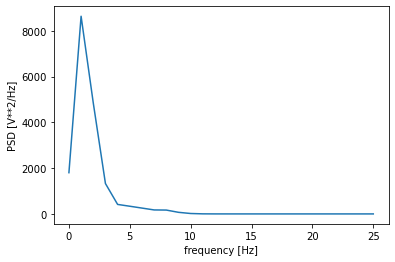

In [123]:
plt.plot(f[selected],spec)
#plt.ylim([0.5e-3, 1])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

In [124]:
f[selected][np.argmax(specc)]

1.0